In [29]:
import pandas as pd


In [30]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/priyanshukumar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [31]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import string
import unicodedata
import re

In [32]:
csv_file_path = 'user_review.csv'
user_reviews = pd.read_csv(csv_file_path)

In [33]:
print("Head of user_reviews:")
print(user_reviews.head())

Head of user_reviews:
   id                                             review
0   1  I love this app! It is so useful and easy to use.
1   2  Terrible experience. The app crashes all the t...
2   3        Decent app but needs improvement in the UI.
3   4           Fantastic! This app has changed my life.
4   5       The app is okay, but it lacks many features.


In [34]:
print("Head of user_reviews:")
print(user_reviews.tail())

Head of user_reviews:
    id                                    review
45  46                 Helpful customer support.
46  47  The app doesnâ€™t have enough tutorials.
47  48    Fantastic performance and reliability.
48  49           I wouldnâ€™t use any other app.
49  50            The app could use a dark mode.


In [35]:
user_reviews.dropna(inplace=True)

In [36]:
if 'review' not in user_reviews.columns:
    raise ValueError("The CSV file does not contain a 'review' column.")

In [37]:
def normalize_text(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [38]:
def preprocess_text(text):
    text = normalize_text(text)
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    return text

In [39]:
preprocess_text("The app doesnâ€™t have enough tutorials.")

'the app doesnatmt have enough tutorials'

In [40]:
user_reviews['cleaned_review'] = user_reviews['review'].apply(preprocess_text)

In [41]:
user_reviews.head()

,id,review,cleaned_review
0,1,I love this app! It is so useful and easy to use.,i love this app it is so useful and easy to use
1,2,Terrible experience. The app crashes all the t...,terrible experience the app crashes all the time
2,3,Decent app but needs improvement in the UI.,decent app but needs improvement in the ui
3,4,Fantastic! This app has changed my life.,fantastic this app has changed my life
4,5,"The app is okay, but it lacks many features.",the app is okay but it lacks many features


In [42]:
sid = SentimentIntensityAnalyzer()

In [43]:
def analyze_sentiment(text):
    sentiment_scores = sid.polarity_scores(text)
    compound_score = sentiment_scores['compound']
    if compound_score > 0.05:
        return 'positive'
    elif compound_score < -0.05:
        return 'negative'
    else:
        return 'neutral'

In [44]:
user_reviews['sentiment'] = user_reviews['cleaned_review'].apply(analyze_sentiment)

In [45]:
user_reviews.head()

,id,review,cleaned_review,sentiment
0,1,I love this app! It is so useful and easy to use.,i love this app it is so useful and easy to use,positive
1,2,Terrible experience. The app crashes all the t...,terrible experience the app crashes all the time,negative
2,3,Decent app but needs improvement in the UI.,decent app but needs improvement in the ui,positive
3,4,Fantastic! This app has changed my life.,fantastic this app has changed my life,positive
4,5,"The app is okay, but it lacks many features.",the app is okay but it lacks many features,positive


In [46]:
user_reviews.tail()

,id,review,cleaned_review,sentiment
45,46,Helpful customer support.,helpful customer support,positive
46,47,The app doesnâ€™t have enough tutorials.,the app doesnatmt have enough tutorials,neutral
47,48,Fantastic performance and reliability.,fantastic performance and reliability,positive
48,49,I wouldnâ€™t use any other app.,i wouldnatmt use any other app,neutral
49,50,The app could use a dark mode.,the app could use a dark mode,neutral


In [47]:
summary_report = user_reviews['sentiment'].value_counts(normalize=True) * 100
print("\nSummary Report (Percentage of each sentiment):")
print(summary_report)


Summary Report (Percentage of each sentiment):
sentiment
positive    54.0
neutral     28.0
negative    18.0
Name: proportion, dtype: float64


In [48]:
summary_report.to_csv('summary_report.csv', header=True)

In [49]:
# Save the cleaned data with sentiments to a new CSV file
user_reviews.to_csv('cleaned_user_reviews_with_sentiments.csv', index=False)

In [50]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


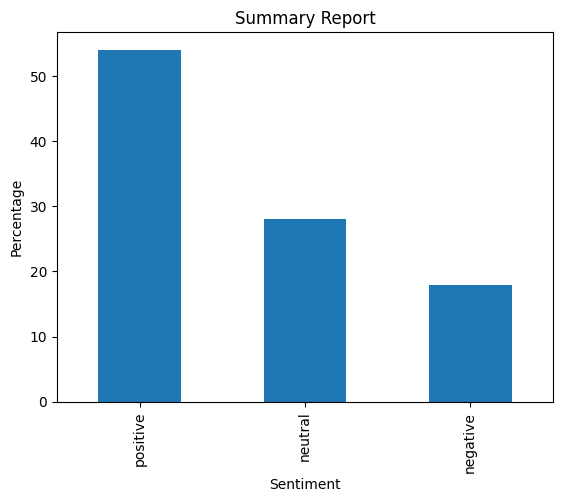

In [51]:
import matplotlib.pyplot as plt

# Create a bar plot for the summary report
ax = summary_report.plot(kind='bar', color=['red', 'green', 'blue'])
# Set the title and labels for the plot
plt.title('Summary Report')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')

# Display the plot
plt.show()